In [2]:
from typing import Sequence

from PIL import Image

import subprocess
import xml.etree.ElementTree as ET

In [3]:
%%bash

adb devices

List of devices attached
emulator-5554	device



In [4]:
_serial = 'emulator-5554'
_screenshot_filepath = '/tmp/screenshot.png'

In [5]:
def adb_exec(serial: str, cmds: Sequence[str], exec_with_shell: bool = False) -> str:
    """Execute adb commands."""
    
    adb_cmds = ['adb', '-s', serial] + list(cmds)

    if exec_with_shell:
        adb_cmds = ' '.join(adb_cmds)
    
    p = subprocess.Popen(
        adb_cmds,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        shell=exec_with_shell
    )
    out, _ = p.communicate()

    return out.decode('utf8')

def get_dump_hierarchy(serial: str) -> str:
    return adb_exec(serial, ('shell', 'uiautomator', 'dump', '>', '/dev/null', '&&', 'cat',
                     '/sdcard/window_dump.xml'))

def get_display_size(serial):
    return adb_exec(serial, ('shell', 'wm', 'size'))
                             
def save_screenshot(serial: str, filepath: str) -> str:
    return adb_exec(serial, ('exec-out', 'screencap', '-p', '>', filepath), exec_with_shell=True)

In [6]:
dump_xml = get_dump_hierarchy(_serial)
dump_xml

'<?xml version=\'1.0\' encoding=\'UTF-8\' standalone=\'yes\' ?><hierarchy rotation="0"><node index="0" text="" resource-id="" class="android.widget.FrameLayout" package="com.google.android.apps.nexuslauncher" content-desc="" checkable="false" checked="false" clickable="false" enabled="true" focusable="false" focused="false" scrollable="false" long-clickable="false" password="false" selected="false" bounds="[0,0][1080,2148]"><node index="0" text="" resource-id="" class="android.widget.LinearLayout" package="com.google.android.apps.nexuslauncher" content-desc="" checkable="false" checked="false" clickable="false" enabled="true" focusable="false" focused="false" scrollable="false" long-clickable="false" password="false" selected="false" bounds="[0,0][1080,2148]"><node index="0" text="" resource-id="android:id/content" class="android.widget.FrameLayout" package="com.google.android.apps.nexuslauncher" content-desc="" checkable="false" checked="false" clickable="false" enabled="true" focusab

In [7]:
root = ET.fromstring(dump_xml)

In [8]:
all_nodes = tuple(root.iter('node'))

clickable_nodes = (node for node in all_nodes if node.attrib['clickable'] == 'true')

all_rids = (node.attrib['resource-id'] for node in all_nodes if node.attrib['resource-id'])
all_texts = (node.attrib['text'] for node in all_nodes if node.attrib['text'])

print('all rids:')
for rid in all_rids:
    print(f'\t{rid}')
    
print('\nall texts')
for text in all_texts:
    print(f'\t{text}')


all rids:
	android:id/content
	com.google.android.apps.nexuslauncher:id/launcher
	com.google.android.apps.nexuslauncher:id/drag_layer
	com.google.android.apps.nexuslauncher:id/scrim_view
	com.google.android.apps.nexuslauncher:id/workspace
	com.google.android.apps.nexuslauncher:id/search_container_workspace
	com.google.android.apps.nexuslauncher:id/universal_smartspace_container
	com.google.android.apps.nexuslauncher:id/smartspace_content
	com.google.android.apps.nexuslauncher:id/clock
	com.google.android.apps.nexuslauncher:id/page_indicator
	com.google.android.apps.nexuslauncher:id/hotseat
	com.google.android.apps.nexuslauncher:id/apps_view
	com.google.android.apps.nexuslauncher:id/all_apps_header
	com.google.android.apps.nexuslauncher:id/search_container_all_apps
	com.google.android.apps.nexuslauncher:id/g_icon
	com.google.android.apps.nexuslauncher:id/mic_icon

all texts
	Wednesday, Aug 18
	Settings
	Messages
	Clock
	Chrome
	YouTube


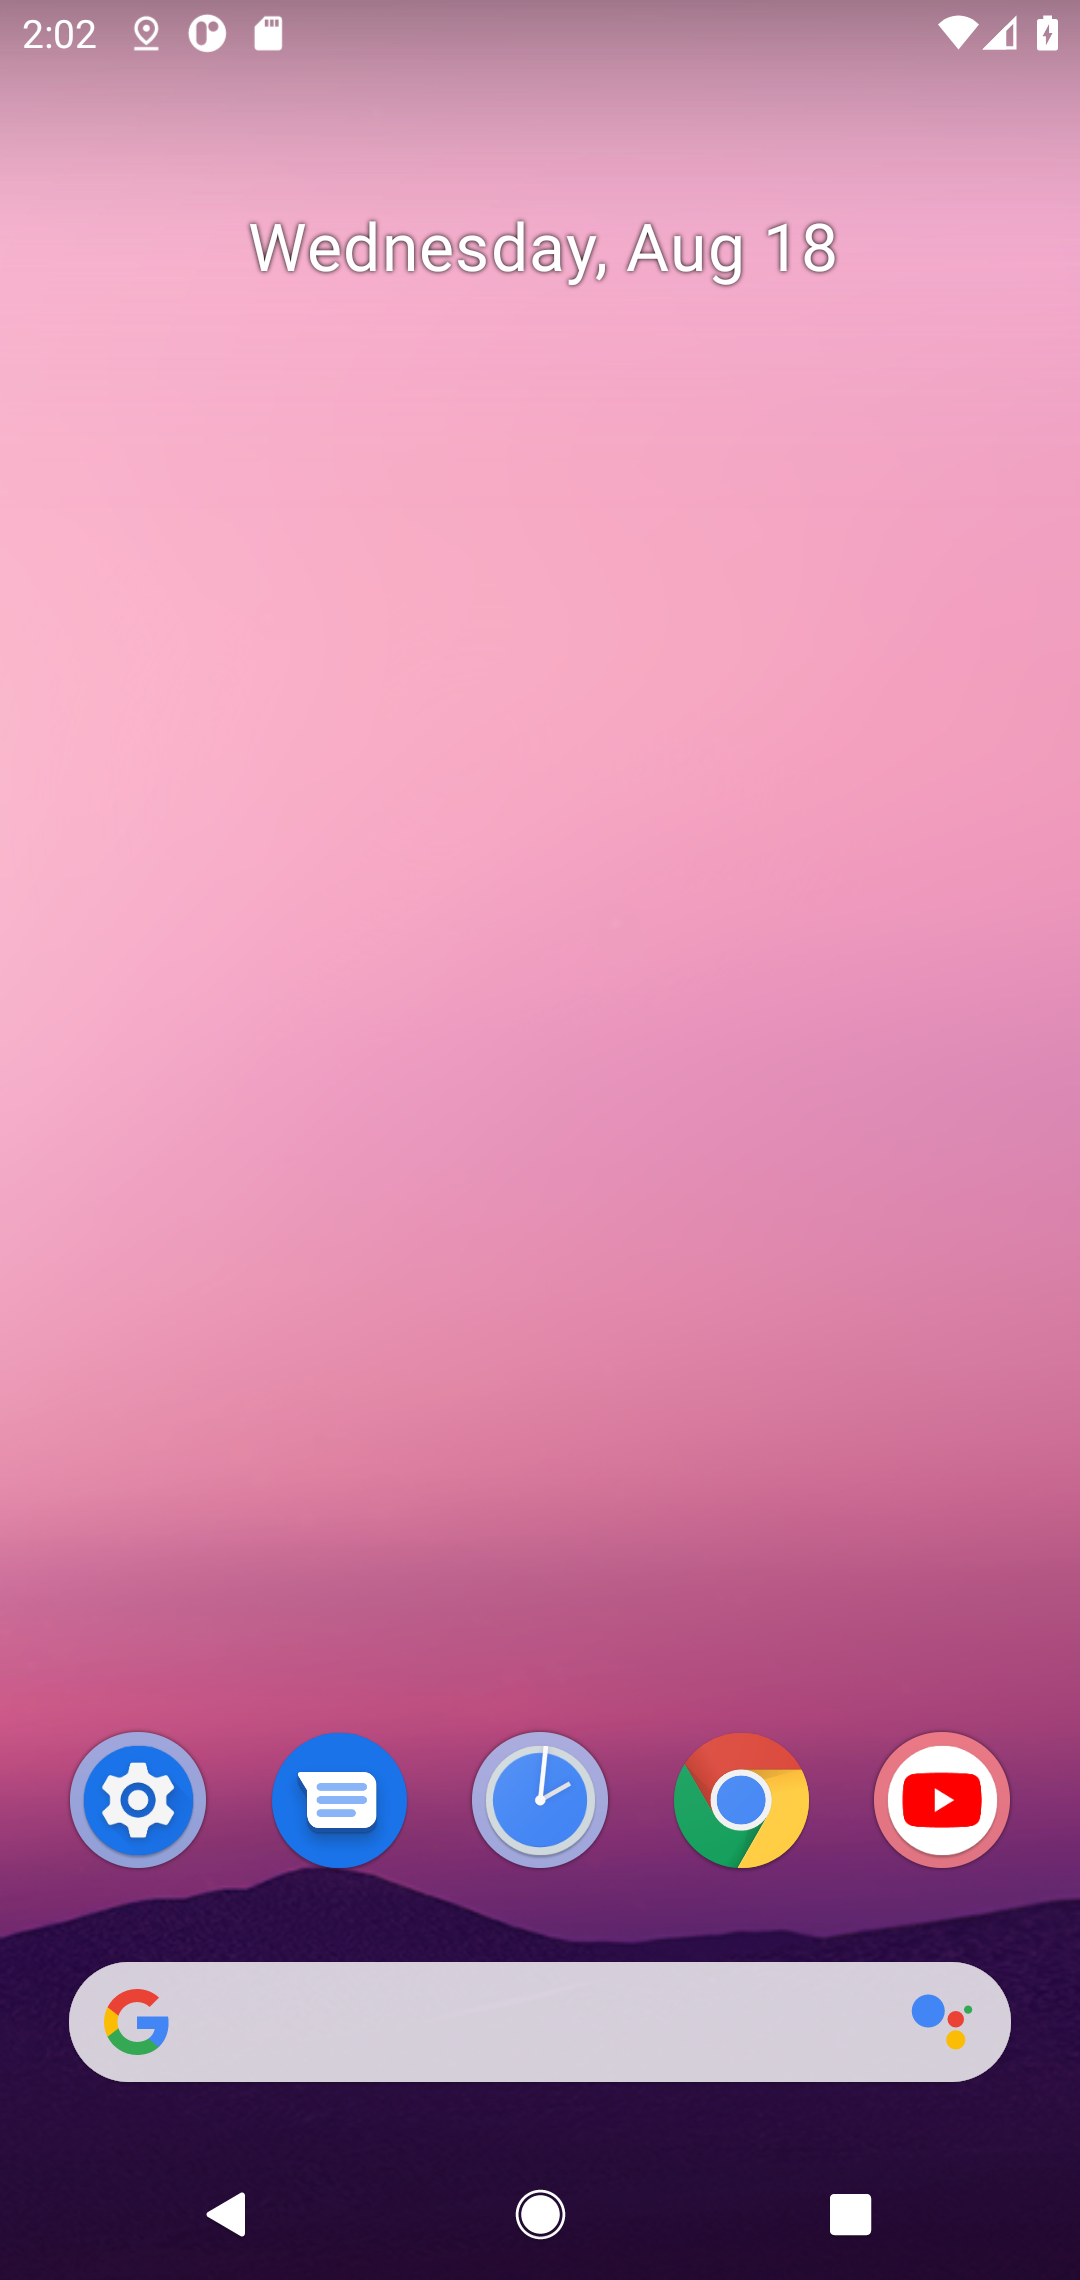

In [9]:
save_screenshot(_serial, _screenshot_filepath)

Image.open(_screenshot_filepath)

In [10]:
get_display_size(_serial)

'Physical size: 1080x2280\n'